In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.2.0'

# fashion_mnist

## 1. Data Load

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [ ]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

## 2. Data 확인 및 전처리

Text(0.5, 1.0, 'Ankle boot')

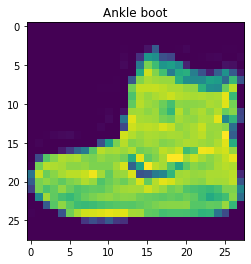

In [ ]:
plt.imshow(X_train[0])
plt.title(class_names[y_train[0]])

In [ ]:
# 정규화
X_train.max(), X_train.min()

(255, 0)

In [ ]:
X_train_, X_test_ = X_train/ 255.0, X_test/255.0

## 3. Model 구성

In [ ]:
L = tf.keras.layers

(28, 28)

In [ ]:
X_train.shape[1:]

(28, 28)

In [ ]:

y_train.shape, y_test.shape, X_train.shape

((60000,), (10000,), (60000, 28, 28))

In [ ]:
# (392, 2)
# (28,28)

In [ ]:
# a= L.Flatten()(X_train_)
# class Flatten(object):
#     def __init__(self, *args, **kwargs):
#         pass
#     def __call__(self, *args, **kwargs):
#         pass

tensorflow.python.keras.layers.core.Flatten

In [ ]:
model = tf.keras.Sequential([
                             # inputLayer: Placeholder
                             L.InputLayer(input_shape=X_train.shape[1:]),
                             L.Flatten(), # 785 = 28 * 28 + 1
                             L.Dense(512, activation='relu'), # 401920 = 785 * 512
                             L.Dense(256, activation='relu'),
                             L.Dense(128, activation='relu'),
                             L.Dense(10, activation='softmax') # num(w) = 5130 = 513 * 10
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
    )

# validation_split
model.fit(X_train_, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4940 - accuracy: 0.8221 - val_loss: 0.3949 - val_accuracy: 0.8571
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3712 - accuracy: 0.8635 - val_loss: 0.3900 - val_accuracy: 0.8530
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3336 - accuracy: 0.8764 - val_loss: 0.3260 - val_accuracy: 0.8834
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3079 - accuracy: 0.8861 - val_loss: 0.3466 - val_accuracy: 0.8742
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2898 - accuracy: 0.8914 - val_loss: 0.3692 - val_accuracy: 0.8627
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2767 - accuracy: 0.8959 - val_loss: 0.3368 - val_accuracy: 0.8779
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2633 - accuracy: 0.9016 - val_loss: 0.3243 - val_accuracy:

:param: validation_split  
- train_set에서 validation_split에 주어진 정도(비율)를 제외하고 학습시키고,
- 그 제외된 data를 검증데이터로 사용한다.  
=> 일반화 오차를 확인하기 위해서.

In [ ]:
model.evaluate(X_train_, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2220 - accuracy: 0.9176


[0.2220255583524704, 0.9176499843597412]

In [ ]:
model.evaluate(X_test_, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8826


[0.34468477964401245, 0.8826000094413757]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 4. Model 학습 및 평가

# cifar10


## 데이터 준비
- https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# (Num(sample), H, W, Channel)
X_train.shape

(50000, 32, 32, 3)

## 데이터 확인

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0,0]

6

Text(0.5, 1.0, '6')

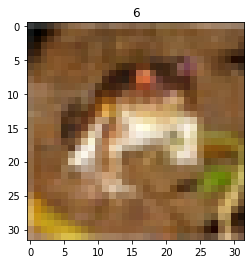

In [ ]:
plt.imshow(X_train[0])
plt.title(y_train[0, 0])

## 모델링

In [ ]:
X_train.reshape(50000, -1).shape

(50000, 3072)

In [ ]:
L = tf.keras.layers
L.Dense

<module 'tensorflow.keras.layers' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/layers/__init__.py'>

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train_, X_test_ = X_train/255, X_test/255

In [ ]:
y_train = tf.cast(y_train, tf.float32)

In [ ]:
kernel_initializer=tf.keras.initializers.he_uniform


In [111]:
model = tf.keras.Sequential([
                             L.InputLayer(input_shape=(32,32, 3)),
                             L.Flatten(),
                            #  L.Dense(2048, 
                            #          activation=tf.keras.activations.relu, 
                            #          kernel_initializer=tf.keras.initializers.he_uniform()
                            #          ),
                             L.Dense(1024,
                                     activation=tf.keras.activations.relu,
                                     kernel_initializer=tf.keras.initializers.he_uniform()
                                     ),
                             L.Dense(512, 
                                     activation=tf.keras.activations.relu,
                                     kernel_initializer=tf.keras.initializers.he_uniform()
                                     ),
                             L.Dense(256,
                                     activation=tf.keras.activations.relu,
                                     kernel_initializer=tf.keras.initializers.he_uniform()
                                     ),
                             L.Dense(10,
                                     activation=tf.keras.activations.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [112]:
X_train_.shape

(50000, 32, 32, 3)

In [113]:
model.fit(X_train_, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.9094 - accuracy: 0.3076 - val_loss: 1.7739 - val_accuracy: 0.3598
Epoch 2/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.7080 - accuracy: 0.3836 - val_loss: 1.6933 - val_accuracy: 0.3978
Epoch 3/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.6206 - accuracy: 0.4177 - val_loss: 1.6404 - val_accuracy: 0.4191
Epoch 4/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5593 - accuracy: 0.4392 - val_loss: 1.5613 - val_accuracy: 0.4455
Epoch 5/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.5164 - accuracy: 0.4566 - val_loss: 1.5809 - val_accuracy: 0.4403
Epoch 6/10
1250/1250 [==============================] - 40s 32ms/step - loss: 1.4784 - accuracy: 0.4696 - val_loss: 1.5367 - val_accuracy: 0.4573
Epoch 7/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.4482 - accuracy: 0.4815 - val_loss: 1.4972 -

In [114]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_71 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_72 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


# 부록. 가중치 초기화

# local minimum이 많을때 어떻게 초기화?
- 최근 심층 CNN은 대부분 가우시안 분포에서 추출한 임의 가중치로 초기화 합니다.

1. Xavier -  Glorot Initialization (sigmoid-activation 초기화)
    - w = np.random.randn(n_input, n_output) / sqrt(n_input)
2. He (Relu 초기화)
    - w = np.random.randn(n_input, n_output) / sqrt(n_input/2) 